<a href="https://colab.research.google.com/github/yerinsally/BDA/blob/main/%EC%A0%95%EC%98%88%EB%A6%B0_0409_%EC%B5%9C%EC%A2%85%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 최종 분석과제

[ 최종 데이터 분석 리포팅 과제 공지 ]


**airplane.csv**

총 3가지로 분석 리포팅 작성

  1. EDA
   - 해당 고객데이터를 시각화를 통한 인사이트를 정리 → Delay에 따른 변수들의 시각화 필수
  2. 통계분석
    - 유의미한 컬럼별로 정규성 검정
    - 상관계수등을 통한 변수간의 관계 정리
  3. 분석 모델링
   - Delay를 예측하는 모델링 → 정확도 외에 f1스코어, precision, recall 등 모두 사용하여 최적의 모델링 선정
   - 하이퍼파라미터 튜닝 필수

### 컬럼 설명

1,000,000개의 데이터 (항공편 운항 관련 정보)
- ID : 샘플 고유 id
- Month: 해당 항공편의 출발 월
- Day_of_Month: Month에 해당하는 월의 날짜
- Estimated_Departure_Time: 전산 시스템을 바탕으로 측정된 비행기의 출발 시간 (HH:MM 형식)
- Estimated_Arrival_Time: 전산 시스템을 바탕으로 측정된 비행기의 도착 시간 (HH:MM 형식)
- Cancelled: 해당 항공편의 취소 여부 (0: 취소되지 않음, 1: 취소됨)
- Diverted: 해당 항공편의 경유 여부 (0: 경유하지 않음, 1: 경유함)
- Origin_Airport: 해당 항공편 출발 공항의 고유 코드 (IATA 공항 코드)
- Origin_Airport_ID: 해당 항공편 출발 공항의 고유 ID (US DOT ID)
- Origin_State: 해당 항공편 출발 공항이 위치한 주의 이름
- Destination_Airport: 해당 항공편 도착 공항의 고유 코드 (IATA 공항 코드)
- Destination_Airport_ID: 해당 항공편 도착 공항의 고유 ID (US DOT ID)
- Destination_State: 해당 항공편 도착 공항이 위치한 주의 이름
- Distance: 출발 공항과 도착 공항 사이의 거리 (mile 단위)
- Airline: 해당 항공편을 운항하는 항공사
- Carrier_Code(IATA): 해당 항공편을 운항하는 항공사의 고유 코드 
(IATA 공항 코드, 단 다른 항공사가 같은 코드를 보유할 수도 있음)
- Carrier_ID(DOT): 해당 항공편을 운항하는 항공사의 고유 ID (US DOT ID)
- Tail_Number: 해당 항공편을 운항하는 항공기의 고유 등록번호
- Delay: 항공편 지연 여부 (Not_Delayed, Delayed) = 예측 레이블
  > 준지도학습을 통해 레이블링 가능, 데이터가 너무 커서 Delay 컬럼이 결측치인 경우는 날리고 진행, 데이터 셋이 너무 작다고 판단되면 결측치를 채우기


## 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/[BDAA 5기] 데이터 분석 기초반/데이터셋/airplane.csv')
data

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,NaN,PHL,14100,NaN,678.0,United Air Lines Inc.,UA,19977.0,N477UA,NaN
999996,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,NaN,MSP,13487,Minnesota,223.0,SkyWest Airlines Inc.,DL,NaN,N439SW,NaN
999997,TRAIN_999997,6,28,800.0,1340.0,0,0,OAK,13796,NaN,HOU,12191,Texas,1642.0,Southwest Airlines Co.,WN,19393.0,N230WN,NaN
999998,TRAIN_999998,9,27,1613.0,1824.0,0,0,BNA,10693,Tennessee,ATL,10397,NaN,214.0,Delta Air Lines Inc.,DL,19790.0,N968DL,NaN


In [13]:
# 데이터 정보 확인
data.info()
# delay 컬럼 : 약 75%의 데이터가 결측치임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1000000 non-null  object 
 1   Month                     1000000 non-null  int64  
 2   Day_of_Month              1000000 non-null  int64  
 3   Estimated_Departure_Time  890981 non-null   float64
 4   Estimated_Arrival_Time    890960 non-null   float64
 5   Cancelled                 1000000 non-null  int64  
 6   Diverted                  1000000 non-null  int64  
 7   Origin_Airport            1000000 non-null  object 
 8   Origin_Airport_ID         1000000 non-null  int64  
 9   Origin_State              890985 non-null   object 
 10  Destination_Airport       1000000 non-null  object 
 11  Destination_Airport_ID    1000000 non-null  int64  
 12  Destination_State         890921 non-null   object 
 13  Distance                  10

In [14]:
# 컬럼별 결측치 합 확인
data.isna().sum()

ID                               0
Month                            0
Day_of_Month                     0
Estimated_Departure_Time    109019
Estimated_Arrival_Time      109040
Cancelled                        0
Diverted                         0
Origin_Airport                   0
Origin_Airport_ID                0
Origin_State                109015
Destination_Airport              0
Destination_Airport_ID           0
Destination_State           109079
Distance                         0
Airline                     108920
Carrier_Code(IATA)          108990
Carrier_ID(DOT)             108997
Tail_Number                      0
Delay                       744999
dtype: int64

In [15]:
data.describe()

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport_ID,Destination_Airport_ID,Distance,Carrier_ID(DOT)
count,1000000.000000,1000000.000000,890981.000000,890960.000000,1000000.0,1000000.0,1000000.000000,1000000.000000,1000000.000000,891003.000000
mean,6.945156,15.764842,1341.153019,1493.295934,0.0,0.0,12696.278484,12701.813986,784.078499,19997.388093
std,3.462506,8.763515,489.814011,520.803494,0.0,0.0,1514.938441,1515.213044,590.790469,404.268639
min,1.000000,1.000000,1.000000,1.000000,0.0,0.0,10135.000000,10135.000000,16.000000,19393.000000
25%,4.000000,8.000000,925.000000,1105.000000,0.0,0.0,11292.000000,11292.000000,350.000000,19790.000000
50%,7.000000,16.000000,1332.000000,1524.000000,0.0,0.0,12889.000000,12889.000000,623.000000,19977.000000
75%,10.000000,23.000000,1742.000000,1924.000000,0.0,0.0,14057.000000,14057.000000,1020.000000,20378.000000
max,12.000000,31.000000,2359.000000,2400.000000,0.0,0.0,16869.000000,16869.000000,5095.000000,21171.000000


In [16]:
# 결측치 삭제
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113787 entries, 13 to 999992
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        113787 non-null  object 
 1   Month                     113787 non-null  int64  
 2   Day_of_Month              113787 non-null  int64  
 3   Estimated_Departure_Time  113787 non-null  float64
 4   Estimated_Arrival_Time    113787 non-null  float64
 5   Cancelled                 113787 non-null  int64  
 6   Diverted                  113787 non-null  int64  
 7   Origin_Airport            113787 non-null  object 
 8   Origin_Airport_ID         113787 non-null  int64  
 9   Origin_State              113787 non-null  object 
 10  Destination_Airport       113787 non-null  object 
 11  Destination_Airport_ID    113787 non-null  int64  
 12  Destination_State         113787 non-null  object 
 13  Distance                  113787 non-null  

In [17]:
data.isna().sum()

ID                          0
Month                       0
Day_of_Month                0
Estimated_Departure_Time    0
Estimated_Arrival_Time      0
Cancelled                   0
Diverted                    0
Origin_Airport              0
Origin_Airport_ID           0
Origin_State                0
Destination_Airport         0
Destination_Airport_ID      0
Destination_State           0
Distance                    0
Airline                     0
Carrier_Code(IATA)          0
Carrier_ID(DOT)             0
Tail_Number                 0
Delay                       0
dtype: int64

In [18]:
data
# 총 11만개의 데이터

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
13,TRAIN_000013,9,19,615.0,706.0,0,0,MAF,13158,Texas,DEN,11292,Colorado,563.0,SkyWest Airlines Inc.,UA,20304.0,N165SY,Not_Delayed
19,TRAIN_000019,7,14,1907.0,2145.0,0,0,BDL,10529,Connecticut,ATL,10397,Georgia,859.0,Delta Air Lines Inc.,DL,19790.0,N962DN,Not_Delayed
42,TRAIN_000042,10,24,1005.0,1130.0,0,0,ORD,13930,Illinois,STL,15016,Missouri,258.0,Trans States Airlines,UA,20237.0,N835HK,Not_Delayed
59,TRAIN_000059,5,2,1732.0,1935.0,0,0,RIC,14524,Virginia,MCO,13204,Florida,667.0,JetBlue Airways,B6,20409.0,N258JB,Not_Delayed
63,TRAIN_000063,12,28,1820.0,1925.0,0,0,OAK,13796,California,BUR,10800,California,325.0,Southwest Airlines Co.,WN,19393.0,N777QC,Not_Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999943,TRAIN_999943,9,30,1100.0,1155.0,0,0,IND,12339,Indiana,LAS,12889,Nevada,1590.0,Southwest Airlines Co.,WN,19393.0,N8532S,Not_Delayed
999950,TRAIN_999950,11,7,1401.0,1950.0,0,0,PSP,14262,California,ORD,13930,Illinois,1652.0,United Air Lines Inc.,UA,19977.0,N896UA,Not_Delayed
999955,TRAIN_999955,4,12,1310.0,1356.0,0,0,SEA,14747,Washington,PDX,14057,Oregon,129.0,Horizon Air,AS,19687.0,N432QX,Delayed
999985,TRAIN_999985,8,8,1914.0,2039.0,0,0,RDU,14492,North Carolina,JAX,12451,Florida,407.0,Frontier Airlines Inc.,F9,20436.0,N316FR,Not_Delayed


In [19]:
data.describe()

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport_ID,Destination_Airport_ID,Distance,Carrier_ID(DOT)
count,113787.000000,113787.000000,113787.000000,113787.000000,113787.0,113787.0,113787.000000,113787.000000,113787.000000,113787.000000
mean,6.979268,15.791575,1319.472734,1472.848542,0.0,0.0,12696.574538,12697.798615,779.022243,19995.511394
std,3.464936,8.799553,490.528432,517.028467,0.0,0.0,1517.076252,1516.021368,586.129253,404.291099
min,1.000000,1.000000,1.000000,1.000000,0.0,0.0,10135.000000,10135.000000,27.000000,19393.000000
25%,4.000000,8.000000,906.000000,1054.000000,0.0,0.0,11292.000000,11292.000000,349.000000,19790.000000
50%,7.000000,16.000000,1310.000000,1500.000000,0.0,0.0,12889.000000,12889.000000,620.000000,19977.000000
75%,10.000000,23.000000,1730.000000,1910.000000,0.0,0.0,14057.000000,14057.000000,1014.000000,20378.000000
max,12.000000,31.000000,2359.000000,2400.000000,0.0,0.0,16869.000000,16869.000000,5095.000000,21171.000000


In [21]:
# Cancelled, Diverted 값 확인 및 컬럼 삭제
print(data['Cancelled'].value_counts())
print(data['Diverted'].value_counts())

0    113787
Name: Cancelled, dtype: int64
0    113787
Name: Diverted, dtype: int64


In [26]:
data.drop('Cancelled', axis=1, inplace=True)
data.drop('Diverted', axis=1, inplace=True)
data

<ipython-input-26-c15daa114db8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Cancelled', axis=1, inplace=True)
<ipython-input-26-c15daa114db8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Diverted', axis=1, inplace=True)


,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
13,TRAIN_000013,9,19,615.0,706.0,MAF,13158,Texas,DEN,11292,Colorado,563.0,SkyWest Airlines Inc.,UA,20304.0,N165SY,Not_Delayed
19,TRAIN_000019,7,14,1907.0,2145.0,BDL,10529,Connecticut,ATL,10397,Georgia,859.0,Delta Air Lines Inc.,DL,19790.0,N962DN,Not_Delayed
42,TRAIN_000042,10,24,1005.0,1130.0,ORD,13930,Illinois,STL,15016,Missouri,258.0,Trans States Airlines,UA,20237.0,N835HK,Not_Delayed
59,TRAIN_000059,5,2,1732.0,1935.0,RIC,14524,Virginia,MCO,13204,Florida,667.0,JetBlue Airways,B6,20409.0,N258JB,Not_Delayed
63,TRAIN_000063,12,28,1820.0,1925.0,OAK,13796,California,BUR,10800,California,325.0,Southwest Airlines Co.,WN,19393.0,N777QC,Not_Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999943,TRAIN_999943,9,30,1100.0,1155.0,IND,12339,Indiana,LAS,12889,Nevada,1590.0,Southwest Airlines Co.,WN,19393.0,N8532S,Not_Delayed
999950,TRAIN_999950,11,7,1401.0,1950.0,PSP,14262,California,ORD,13930,Illinois,1652.0,United Air Lines Inc.,UA,19977.0,N896UA,Not_Delayed
999955,TRAIN_999955,4,12,1310.0,1356.0,SEA,14747,Washington,PDX,14057,Oregon,129.0,Horizon Air,AS,19687.0,N432QX,Delayed
999985,TRAIN_999985,8,8,1914.0,2039.0,RDU,14492,North Carolina,JAX,12451,Florida,407.0,Frontier Airlines Inc.,F9,20436.0,N316FR,Not_Delayed


## EDA

In [27]:
# 컬럼별 고유값 개수 출력
for col in data.columns:
    print(f"Column {col} has {len(data[col].unique())} unique values")

Column ID has 113787 unique values
Column Month has 12 unique values
Column Day_of_Month has 31 unique values
Column Estimated_Departure_Time has 1268 unique values
Column Estimated_Arrival_Time has 1354 unique values
Column Origin_Airport has 370 unique values
Column Origin_Airport_ID has 370 unique values
Column Origin_State has 52 unique values
Column Destination_Airport has 372 unique values
Column Destination_Airport_ID has 372 unique values
Column Destination_State has 52 unique values
Column Distance has 1546 unique values
Column Airline has 28 unique values
Column Carrier_Code(IATA) has 11 unique values
Column Carrier_ID(DOT) has 28 unique values
Column Tail_Number has 6178 unique values
Column Delay has 2 unique values


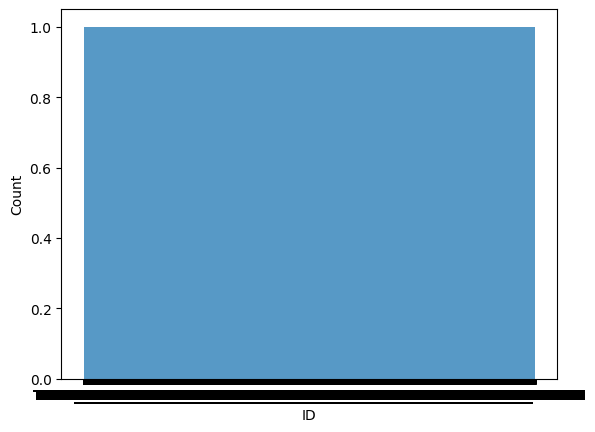

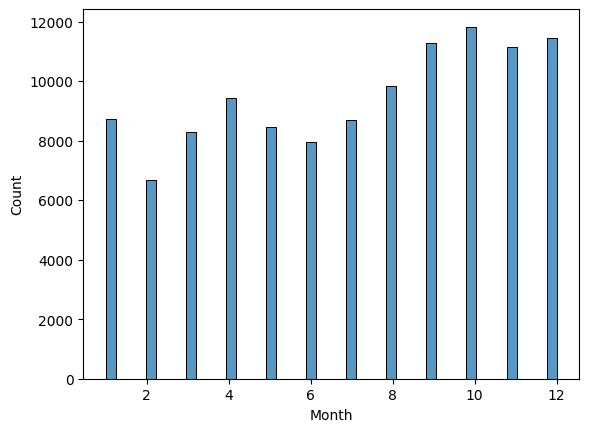

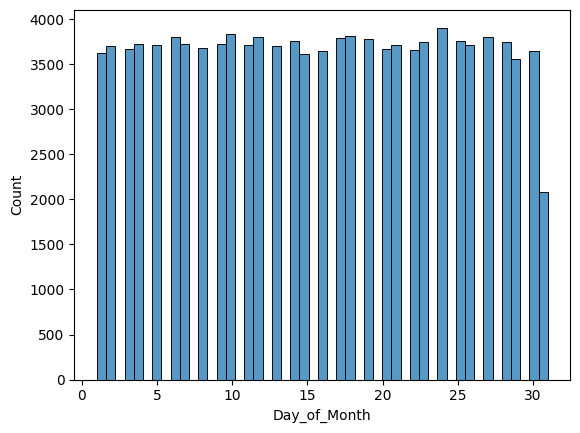

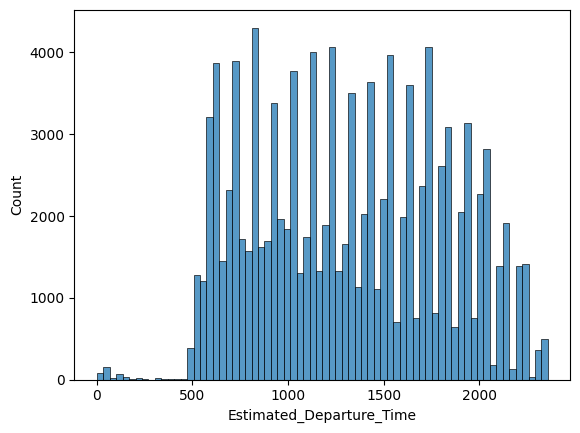

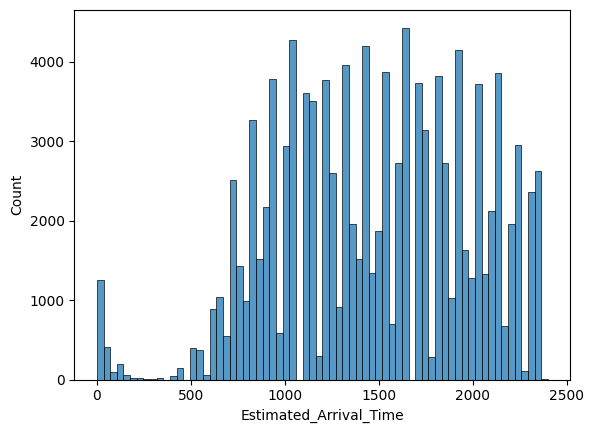

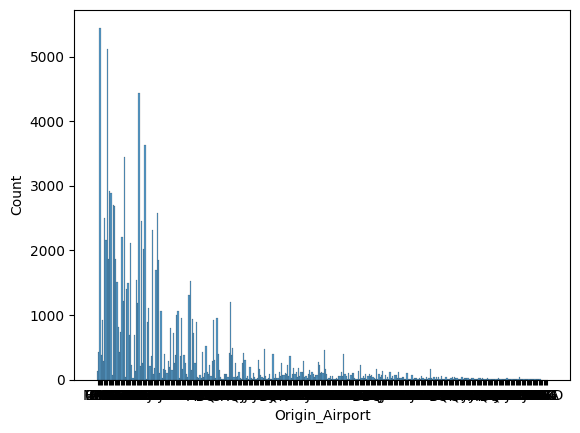

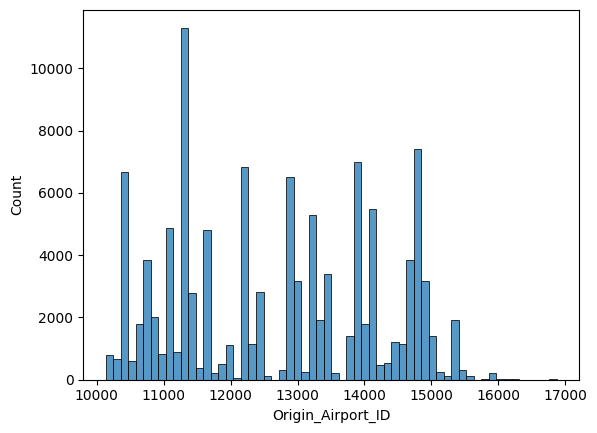

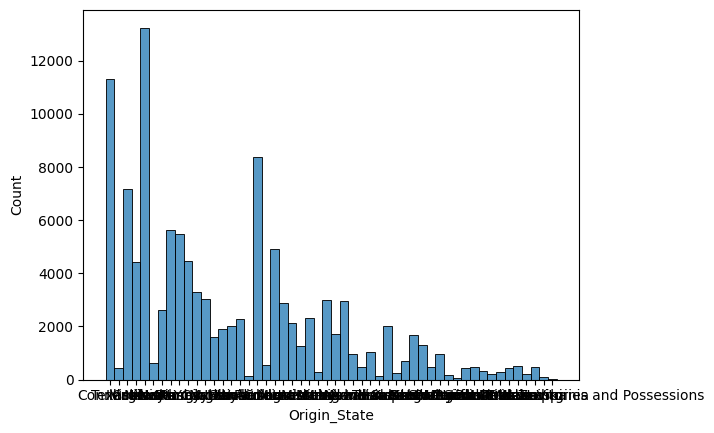

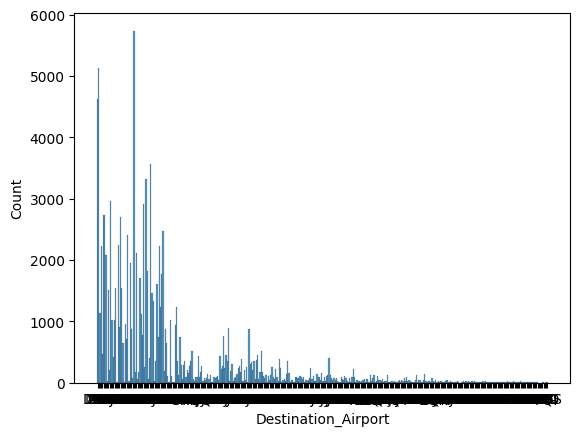

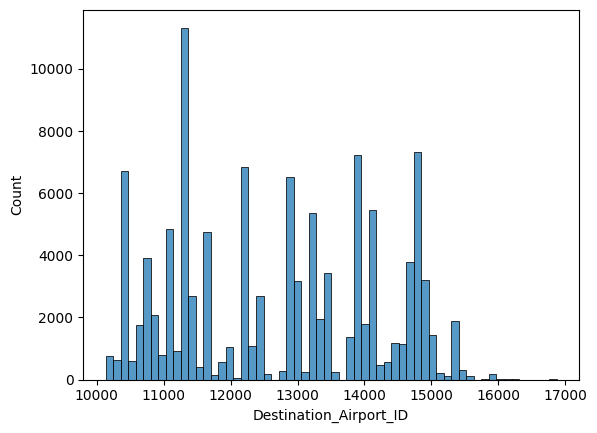

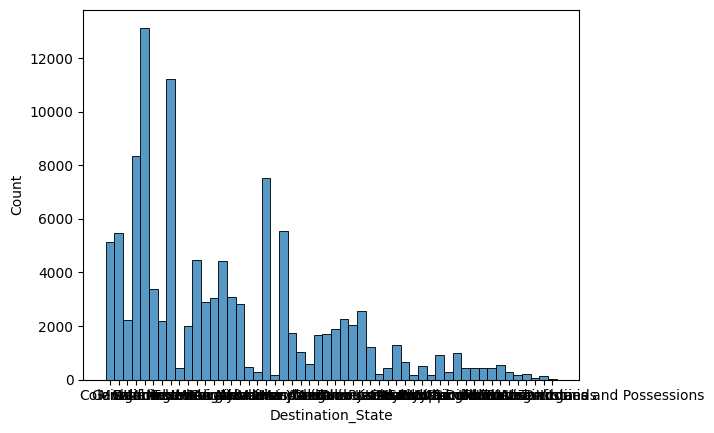

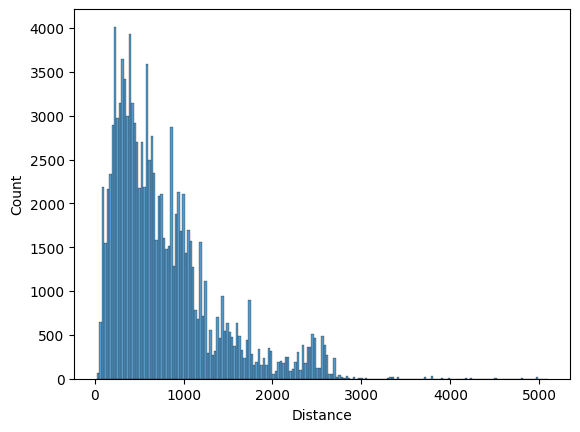

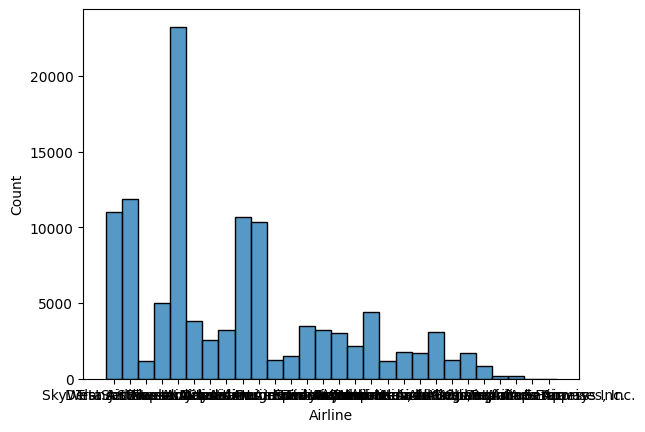

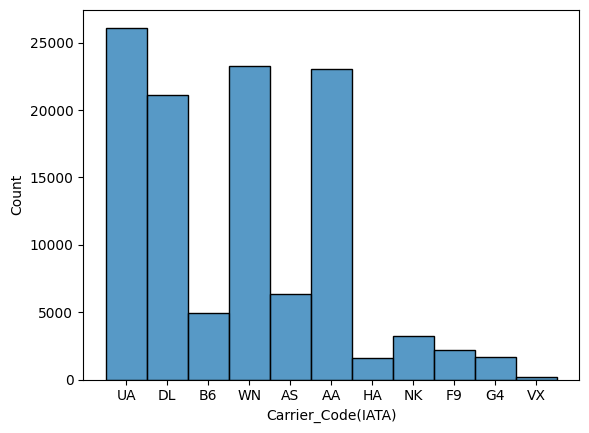

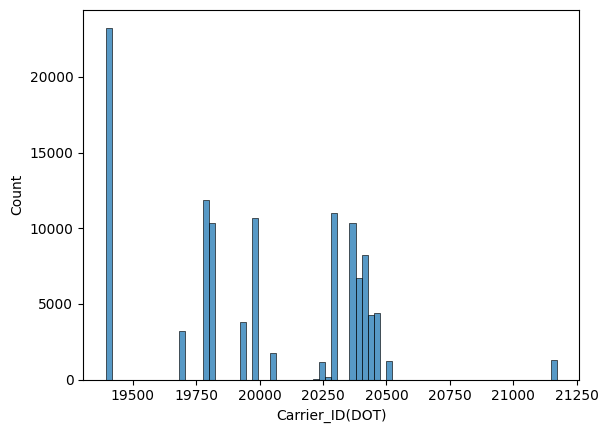

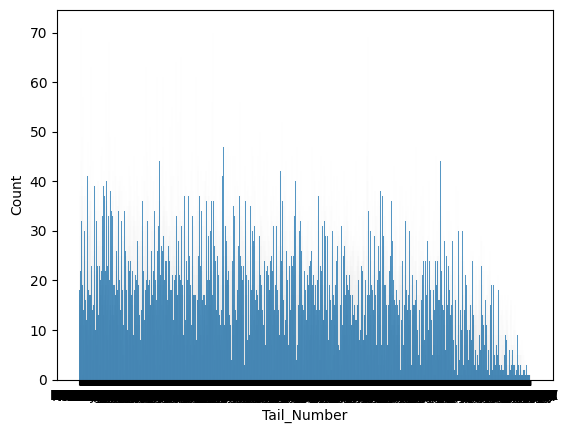

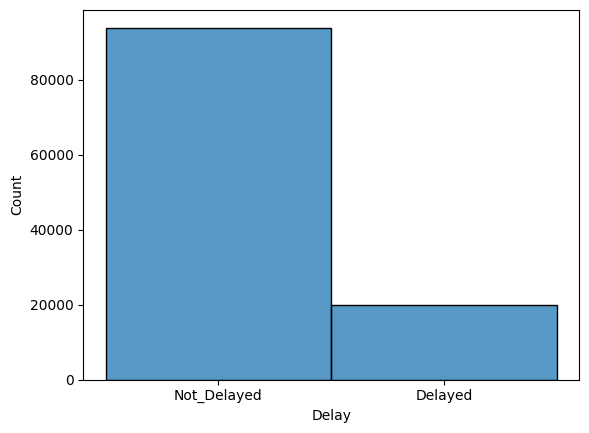

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 

for col in data.columns:
    plt.figure()
    sns.histplot(data=data, x=col)
    plt.show()

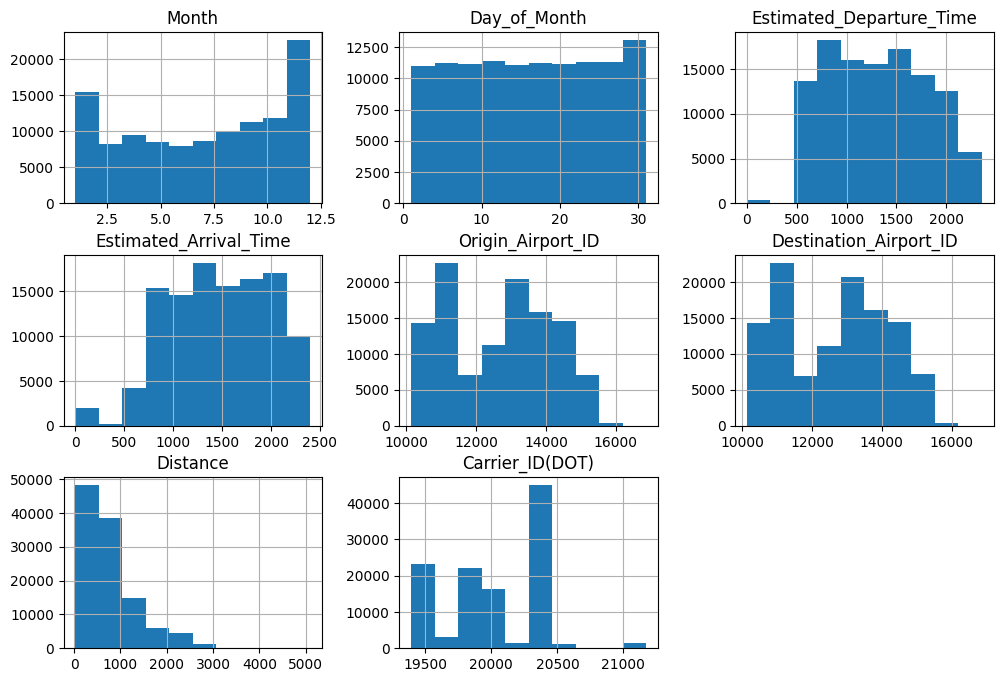

In [29]:
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]
data.hist(figsize=(12,8));

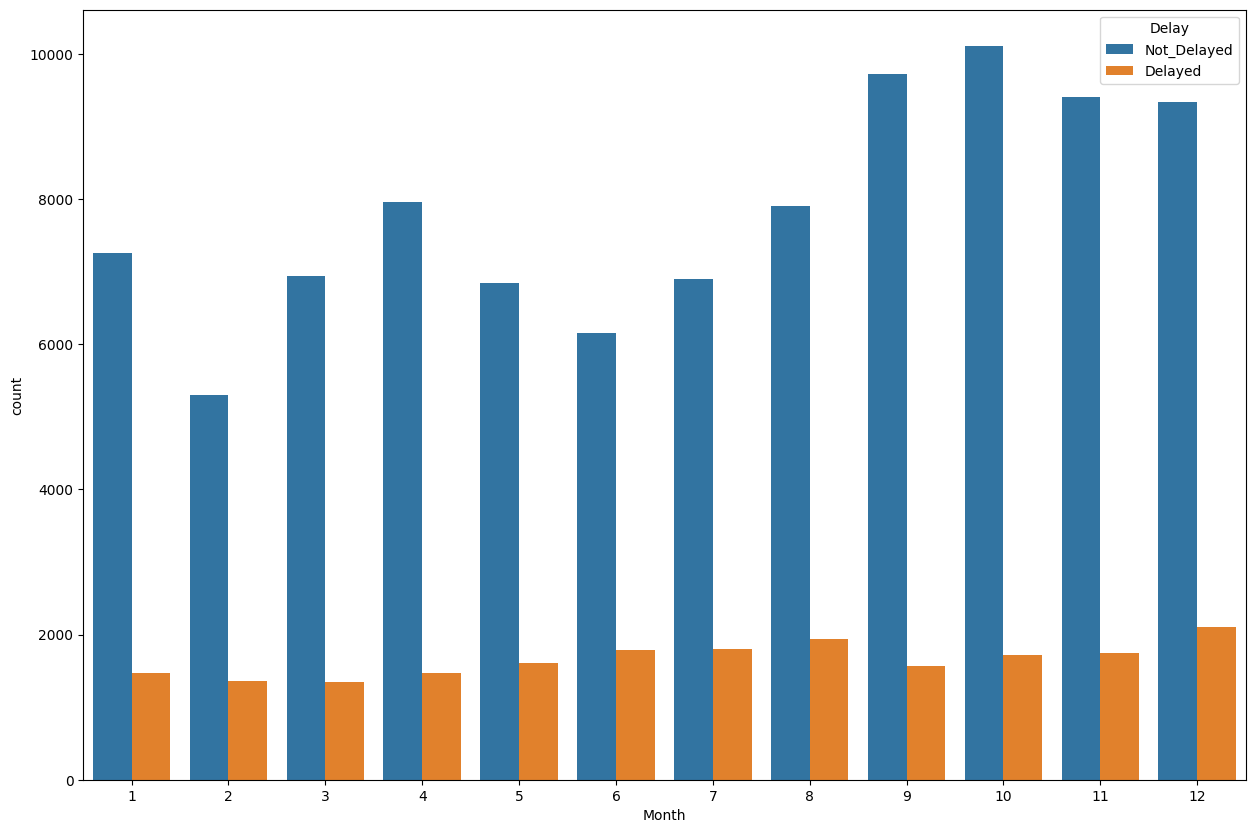

In [34]:
# y값 레이블에 따른 컬럼 분포 시각화 : 고유한 개수 적은 컬럼만
sns.countplot(x='Month', hue='Delay', data=data)
plt.show()

연착된 경우는 월마다 별반 다르지 않지만, 연착되지 않은 경우는 9-10월에 가장 많다.

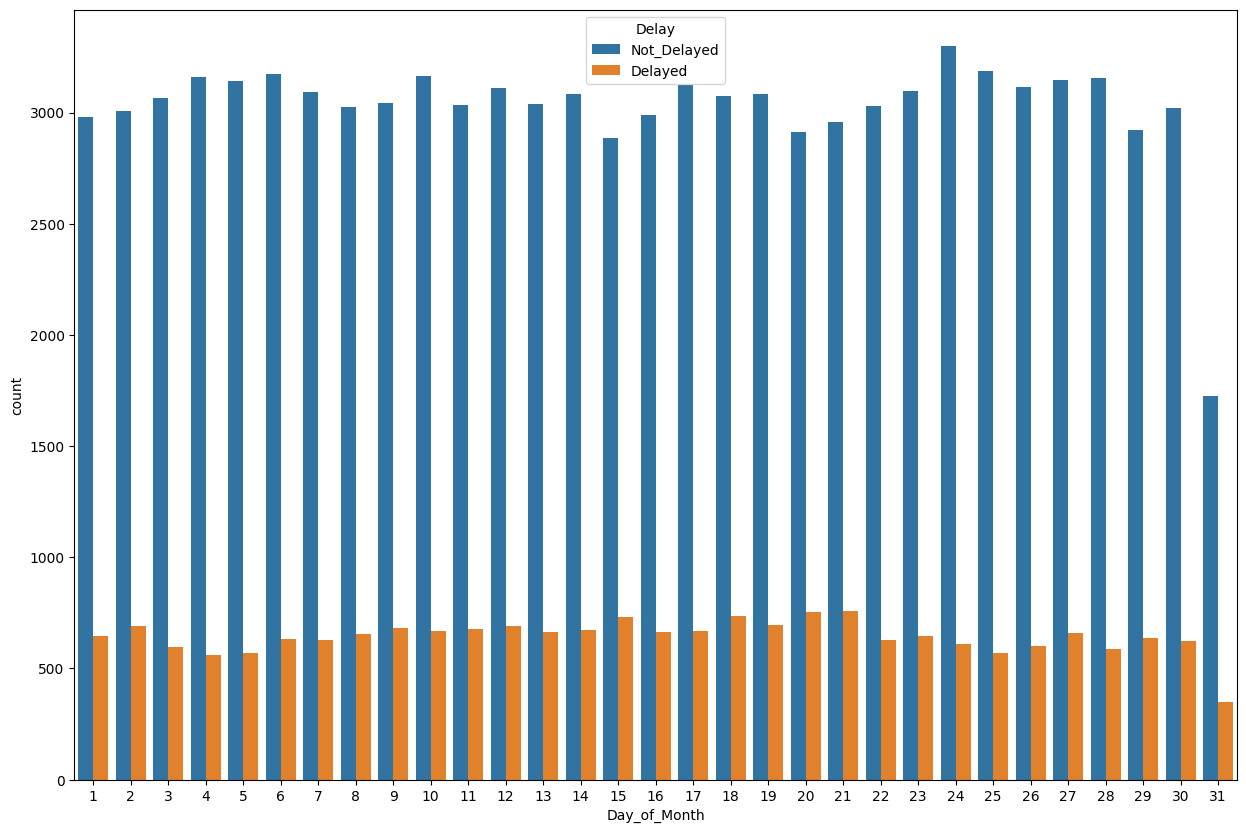

In [35]:
sns.countplot(x='Day_of_Month', hue='Delay', data=data)
plt.show()

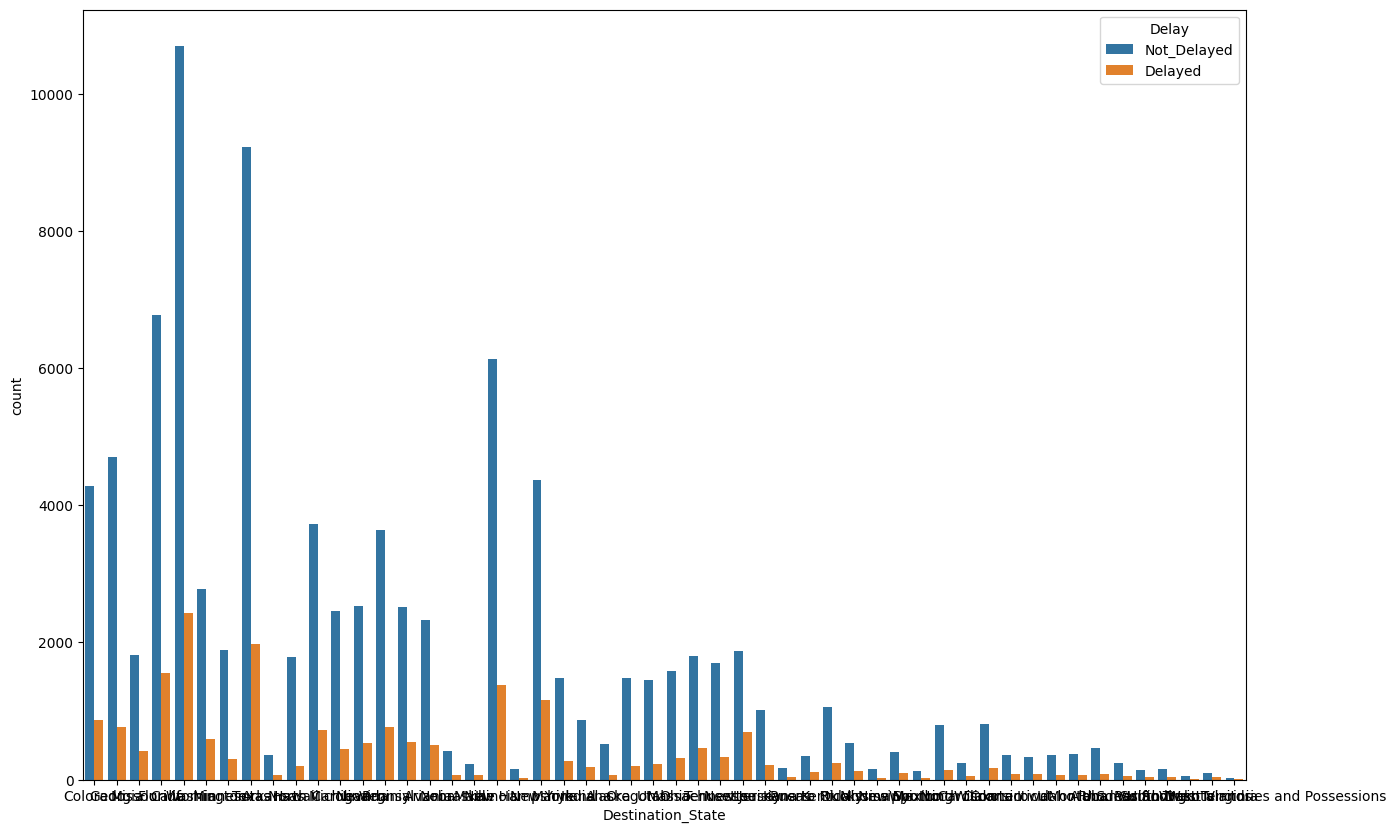

In [37]:
sns.countplot(x='Destination_State', hue='Delay', data=data)
plt.show()

Destination_State(해당 항공편 도착 공항이 위치한 주의 이름)에 따라 Delay 차이가 많이 나는 것을 알 수 있다.

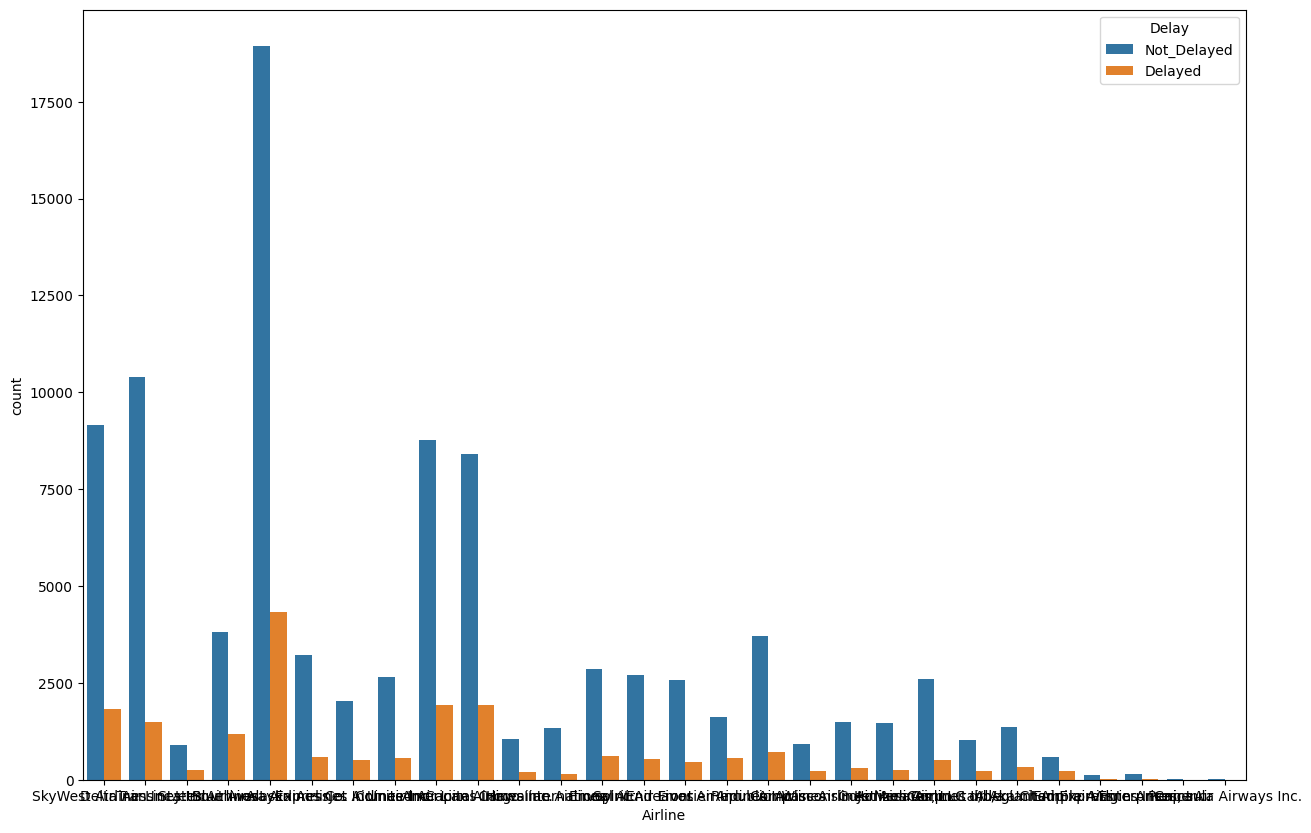

In [38]:
sns.countplot(x='Airline', hue='Delay', data=data)
plt.show()

역시 Airline(해당 항공편을 운항하는 항공사)에 따라 연착 여부가 많이 달라지는 것을 확인할 수 있다.

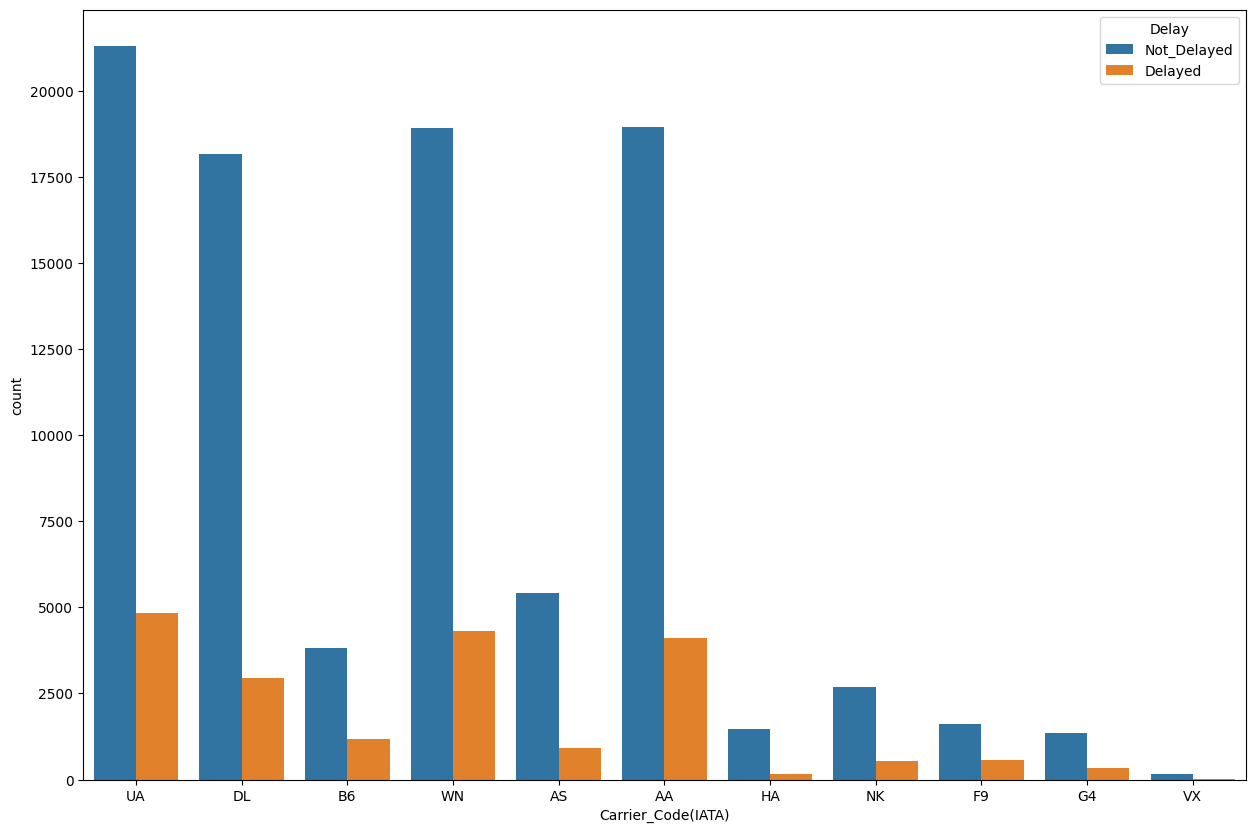

In [39]:
sns.countplot(x='Carrier_Code(IATA)', hue='Delay', data=data)
plt.show()

Carrier_Code(IATA)(해당 항공편을 운항하는 항공사의 고유 코드)에 따라 역시 연착 여부가 꽤 많이 달라지는 알 수 있다.

## 변수 간 관계

In [40]:
# 상관계수 계산
corr_matrix = data.corr()
print(corr_matrix)

                             Month  Day_of_Month  Estimated_Departure_Time  \
Month                     1.000000      0.003212                 -0.004178   
Day_of_Month              0.003212      1.000000                 -0.000639   
Estimated_Departure_Time -0.004178     -0.000639                  1.000000   
Estimated_Arrival_Time   -0.007726      0.003618                  0.692286   
Origin_Airport_ID        -0.008847     -0.002705                 -0.017137   
Destination_Airport_ID   -0.006605     -0.002784                  0.028337   
Distance                 -0.016064      0.006093                 -0.008429   
Carrier_ID(DOT)           0.017045     -0.001409                  0.006131   

                          Estimated_Arrival_Time  Origin_Airport_ID  \
Month                                  -0.007726          -0.008847   
Day_of_Month                            0.003618          -0.002705   
Estimated_Departure_Time                0.692286          -0.017137   
Estimated_Arr

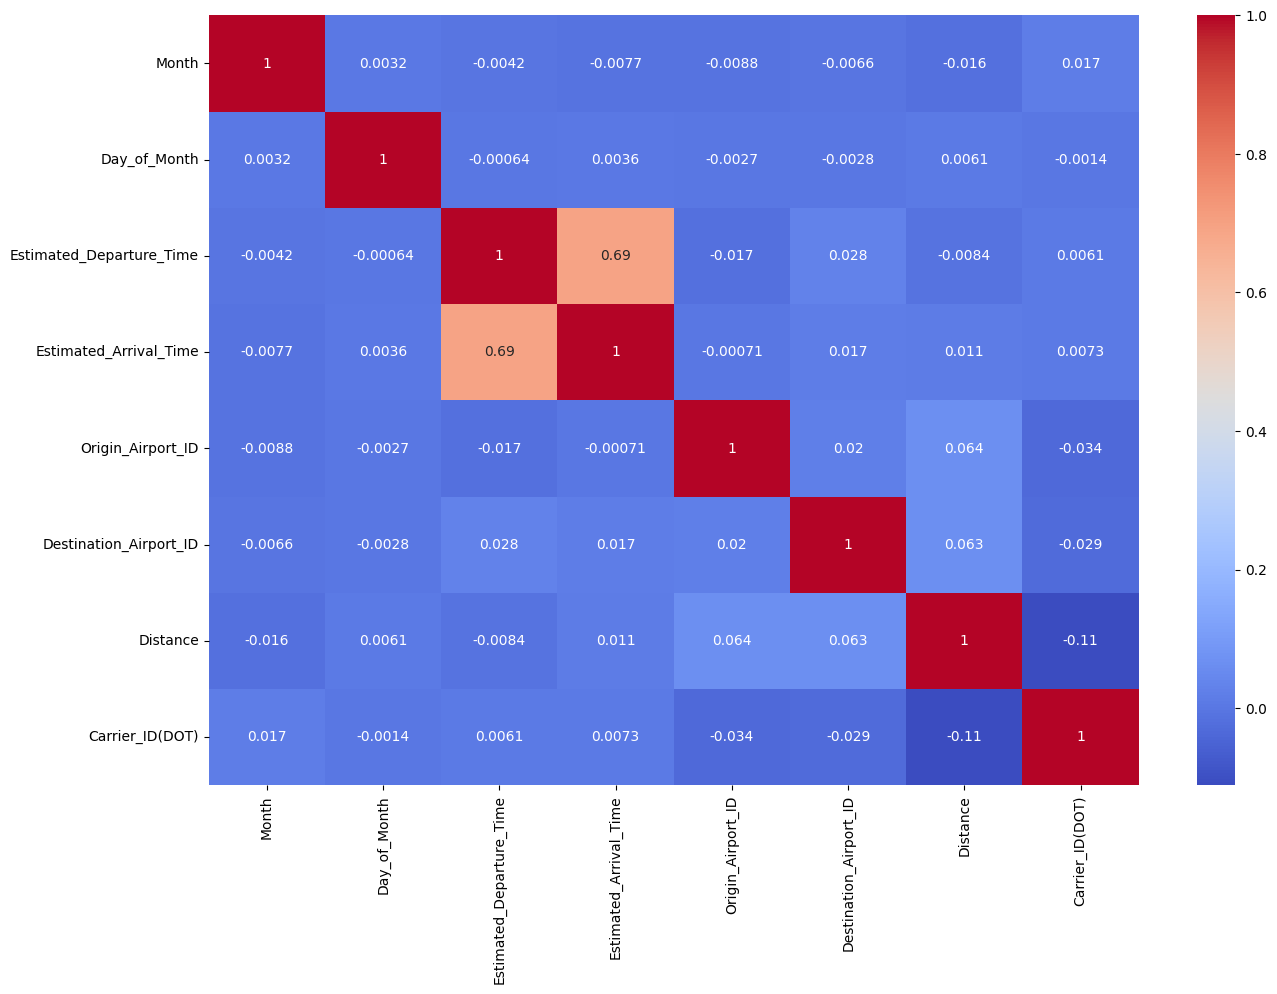

In [41]:
# 시각화
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

## 모델링

### 전처리

둘 중 하나 삭제해도 되는 컬럼
- Origin_Airport, Origin_Airport_ID
- Destination_Airport, Destination_Airport_ID
- Carrier_Code(IATA), Carrier_ID(DOT) → 보류

In [42]:
data.drop('Origin_Airport', axis=1, inplace=True)
data.drop('Destination_Airport', axis=1, inplace=True)
data

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Origin_State,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
13,TRAIN_000013,9,19,615.0,706.0,13158,Texas,11292,Colorado,563.0,SkyWest Airlines Inc.,UA,20304.0,N165SY,Not_Delayed
19,TRAIN_000019,7,14,1907.0,2145.0,10529,Connecticut,10397,Georgia,859.0,Delta Air Lines Inc.,DL,19790.0,N962DN,Not_Delayed
42,TRAIN_000042,10,24,1005.0,1130.0,13930,Illinois,15016,Missouri,258.0,Trans States Airlines,UA,20237.0,N835HK,Not_Delayed
59,TRAIN_000059,5,2,1732.0,1935.0,14524,Virginia,13204,Florida,667.0,JetBlue Airways,B6,20409.0,N258JB,Not_Delayed
63,TRAIN_000063,12,28,1820.0,1925.0,13796,California,10800,California,325.0,Southwest Airlines Co.,WN,19393.0,N777QC,Not_Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999943,TRAIN_999943,9,30,1100.0,1155.0,12339,Indiana,12889,Nevada,1590.0,Southwest Airlines Co.,WN,19393.0,N8532S,Not_Delayed
999950,TRAIN_999950,11,7,1401.0,1950.0,14262,California,13930,Illinois,1652.0,United Air Lines Inc.,UA,19977.0,N896UA,Not_Delayed
999955,TRAIN_999955,4,12,1310.0,1356.0,14747,Washington,14057,Oregon,129.0,Horizon Air,AS,19687.0,N432QX,Delayed
999985,TRAIN_999985,8,8,1914.0,2039.0,14492,North Carolina,12451,Florida,407.0,Frontier Airlines Inc.,F9,20436.0,N316FR,Not_Delayed


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113787 entries, 13 to 999992
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        113787 non-null  object 
 1   Month                     113787 non-null  int64  
 2   Day_of_Month              113787 non-null  int64  
 3   Estimated_Departure_Time  113787 non-null  float64
 4   Estimated_Arrival_Time    113787 non-null  float64
 5   Origin_Airport_ID         113787 non-null  int64  
 6   Origin_State              113787 non-null  object 
 7   Destination_Airport_ID    113787 non-null  int64  
 8   Destination_State         113787 non-null  object 
 9   Distance                  113787 non-null  float64
 10  Airline                   113787 non-null  object 
 11  Carrier_Code(IATA)        113787 non-null  object 
 12  Carrier_ID(DOT)           113787 non-null  float64
 13  Tail_Number               113787 non-null  

In [44]:
# 범주형 특성을 가진 문자형 변수 Label Encodiing
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성 및 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Origin_State = le.fit_transform(data['Origin_State'])

# 인코딩 결과를 새로운 컬럼으로 추가
data = data.assign(Origin_State=Origin_State)

# 데이터프레임 출력
data

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Origin_State,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
13,TRAIN_000013,9,19,615.0,706.0,13158,42,11292,Colorado,563.0,SkyWest Airlines Inc.,UA,20304.0,N165SY,Not_Delayed
19,TRAIN_000019,7,14,1907.0,2145.0,10529,6,10397,Georgia,859.0,Delta Air Lines Inc.,DL,19790.0,N962DN,Not_Delayed
42,TRAIN_000042,10,24,1005.0,1130.0,13930,11,15016,Missouri,258.0,Trans States Airlines,UA,20237.0,N835HK,Not_Delayed
59,TRAIN_000059,5,2,1732.0,1935.0,14524,47,13204,Florida,667.0,JetBlue Airways,B6,20409.0,N258JB,Not_Delayed
63,TRAIN_000063,12,28,1820.0,1925.0,13796,4,10800,California,325.0,Southwest Airlines Co.,WN,19393.0,N777QC,Not_Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999943,TRAIN_999943,9,30,1100.0,1155.0,12339,12,12889,Nevada,1590.0,Southwest Airlines Co.,WN,19393.0,N8532S,Not_Delayed
999950,TRAIN_999950,11,7,1401.0,1950.0,14262,4,13930,Illinois,1652.0,United Air Lines Inc.,UA,19977.0,N896UA,Not_Delayed
999955,TRAIN_999955,4,12,1310.0,1356.0,14747,48,14057,Oregon,129.0,Horizon Air,AS,19687.0,N432QX,Delayed
999985,TRAIN_999985,8,8,1914.0,2039.0,14492,31,12451,Florida,407.0,Frontier Airlines Inc.,F9,20436.0,N316FR,Not_Delayed


In [45]:
# 다른 변수들도 레이블 인코딩 진행
Destination_State = le.fit_transform(data['Destination_State'])
Airline = le.fit_transform(data['Airline'])
Carrier_Code = le.fit_transform(data['Carrier_Code(IATA)'])
Tail_Number = le.fit_transform(data['Tail_Number'])

data = data.assign(Destination_State=Destination_State)
data = data.assign(Airline=Airline)
data = data.assign(Carrier_Code=Carrier_Code)
data = data.assign(Tail_Number=Tail_Number)

data

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Origin_State,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay,Carrier_Code
13,TRAIN_000013,9,19,615.0,706.0,13158,42,11292,5,563.0,22,UA,20304.0,561,Not_Delayed,8
19,TRAIN_000019,7,14,1907.0,2145.0,10529,6,10397,8,859.0,9,DL,19790.0,5896,Not_Delayed,3
42,TRAIN_000042,10,24,1005.0,1130.0,13930,11,15016,23,258.0,25,UA,20237.0,4550,Not_Delayed,8
59,TRAIN_000059,5,2,1732.0,1935.0,14524,47,13204,7,667.0,18,B6,20409.0,1087,Not_Delayed,2
63,TRAIN_000063,12,28,1820.0,1925.0,13796,4,10800,4,325.0,23,WN,19393.0,4038,Not_Delayed,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999943,TRAIN_999943,9,30,1100.0,1155.0,12339,12,12889,26,1590.0,23,WN,19393.0,4698,Not_Delayed,10
999950,TRAIN_999950,11,7,1401.0,1950.0,14262,4,13930,11,1652.0,26,UA,19977.0,5140,Not_Delayed,8
999955,TRAIN_999955,4,12,1310.0,1356.0,14747,48,14057,35,129.0,17,AS,19687.0,2141,Delayed,1
999985,TRAIN_999985,8,8,1914.0,2039.0,14492,31,12451,7,407.0,14,F9,20436.0,1411,Not_Delayed,4


In [46]:
data.drop('Carrier_Code(IATA)', axis=1, inplace=True)

# 레이블 값을 숫자로 대응시키는 매핑
Delay = {'Not_Delayed': 0, 'Delayed': 1}

# 매핑을 사용하여 레이블 값을 변환
data['Delay'] = data['Delay'].map(Delay)
data

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Origin_State,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_ID(DOT),Tail_Number,Delay,Carrier_Code
13,TRAIN_000013,9,19,615.0,706.0,13158,42,11292,5,563.0,22,20304.0,561,0,8
19,TRAIN_000019,7,14,1907.0,2145.0,10529,6,10397,8,859.0,9,19790.0,5896,0,3
42,TRAIN_000042,10,24,1005.0,1130.0,13930,11,15016,23,258.0,25,20237.0,4550,0,8
59,TRAIN_000059,5,2,1732.0,1935.0,14524,47,13204,7,667.0,18,20409.0,1087,0,2
63,TRAIN_000063,12,28,1820.0,1925.0,13796,4,10800,4,325.0,23,19393.0,4038,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999943,TRAIN_999943,9,30,1100.0,1155.0,12339,12,12889,26,1590.0,23,19393.0,4698,0,10
999950,TRAIN_999950,11,7,1401.0,1950.0,14262,4,13930,11,1652.0,26,19977.0,5140,0,8
999955,TRAIN_999955,4,12,1310.0,1356.0,14747,48,14057,35,129.0,17,19687.0,2141,1,1
999985,TRAIN_999985,8,8,1914.0,2039.0,14492,31,12451,7,407.0,14,20436.0,1411,0,4


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113787 entries, 13 to 999992
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        113787 non-null  object 
 1   Month                     113787 non-null  int64  
 2   Day_of_Month              113787 non-null  int64  
 3   Estimated_Departure_Time  113787 non-null  float64
 4   Estimated_Arrival_Time    113787 non-null  float64
 5   Origin_Airport_ID         113787 non-null  int64  
 6   Origin_State              113787 non-null  int64  
 7   Destination_Airport_ID    113787 non-null  int64  
 8   Destination_State         113787 non-null  int64  
 9   Distance                  113787 non-null  float64
 10  Airline                   113787 non-null  int64  
 11  Carrier_ID(DOT)           113787 non-null  float64
 12  Tail_Number               113787 non-null  int64  
 13  Delay                     113787 non-null  

### 모델 적용

In [50]:
# X, y 정의
# X는 고유 ID 제외
X = data.drop(['ID', 'Delay'], axis=1)
y = data['Delay']

In [54]:
X

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport_ID,Origin_State,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_ID(DOT),Tail_Number,Carrier_Code
13,9,19,615.0,706.0,13158,42,11292,5,563.0,22,20304.0,561,8
19,7,14,1907.0,2145.0,10529,6,10397,8,859.0,9,19790.0,5896,3
42,10,24,1005.0,1130.0,13930,11,15016,23,258.0,25,20237.0,4550,8
59,5,2,1732.0,1935.0,14524,47,13204,7,667.0,18,20409.0,1087,2
63,12,28,1820.0,1925.0,13796,4,10800,4,325.0,23,19393.0,4038,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999943,9,30,1100.0,1155.0,12339,12,12889,26,1590.0,23,19393.0,4698,10
999950,11,7,1401.0,1950.0,14262,4,13930,11,1652.0,26,19977.0,5140,8
999955,4,12,1310.0,1356.0,14747,48,14057,35,129.0,17,19687.0,2141,1
999985,8,8,1914.0,2039.0,14492,31,12451,7,407.0,14,20436.0,1411,4


In [55]:
y

13        0
19        0
42        0
59        0
63        0
         ..
999943    0
999950    0
999955    1
999985    0
999992    0
Name: Delay, Length: 113787, dtype: int64

In [59]:
y.value_counts()

0    93848
1    19939
Name: Delay, dtype: int64

In [51]:
# X, y train/test 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(79650, 13) (34137, 13) (79650,) (34137,)


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

# 모델 생성
knn = KNeighborsClassifier(n_neighbors=5) # 이웃 수 설정

# 모델 학습
knn.fit(X_train, y_train)

# 모델 예측
y_pred = knn.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 혼동 행렬(confusion matrix) 계산
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 분류 보고서(classification report) 출력
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# f1-score 계산
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1-Score: ", f1)

Accuracy: 0.7980
Confusion Matrix:
 [[26738  1417]
 [ 5477   505]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     28155
           1       0.26      0.08      0.13      5982

    accuracy                           0.80     34137
   macro avg       0.55      0.52      0.51     34137
weighted avg       0.73      0.80      0.75     34137

F1-Score:  0.12778340080971662


In [58]:
import xgboost as xgb

# XGBoost 모델 학습
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 예측 결과 출력
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# 혼동 행렬(confusion matrix) 계산
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 분류 보고서(classification report) 출력
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# f1-score 계산
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1-Score: ", f1)

Accuracy: 0.822157776020154
Confusion Matrix:
 [[27896   259]
 [ 5812   170]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90     28155
           1       0.40      0.03      0.05      5982

    accuracy                           0.82     34137
   macro avg       0.61      0.51      0.48     34137
weighted avg       0.75      0.82      0.75     34137

F1-Score:  0.05303384807362346


### 언더 샘플링 후 모델 적용
- 언더 샘플링: 다수 클래스에서 일부 샘플을 제거하여 클래스 간 균형을 맞춘다. 이를 통해 학습 데이터의 양이 감소하고, 소수 클래스 데이터의 정보 손실 가능성이 있다.

In [60]:
from imblearn.under_sampling import RandomUnderSampler

# RandomUnderSampler 객체 생성
rus = RandomUnderSampler(random_state=42)

# 언더 샘플링 수행
X_resampled, y_resampled = rus.fit_resample(X, y)

In [62]:
# X, y train/test 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=111)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(27914, 13) (11964, 13) (27914,) (11964,)


In [63]:
# 모델 생성
knn = KNeighborsClassifier(n_neighbors=5) # 이웃 수 설정

# 모델 학습
knn.fit(X_train, y_train)

# 모델 예측
y_pred = knn.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 혼동 행렬(confusion matrix) 계산
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 분류 보고서(classification report) 출력
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# f1-score 계산
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1-Score: ", f1)

Accuracy: 0.5462
Confusion Matrix:
 [[3221 2748]
 [2681 3314]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.54      0.54      5969
           1       0.55      0.55      0.55      5995

    accuracy                           0.55     11964
   macro avg       0.55      0.55      0.55     11964
weighted avg       0.55      0.55      0.55     11964

F1-Score:  0.5497221531060795


In [64]:
# XGBoost 모델 학습
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 예측 결과 출력
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# 혼동 행렬(confusion matrix) 계산
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 분류 보고서(classification report) 출력
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# f1-score 계산
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1-Score: ", f1)

Accuracy: 0.5934470076897359
Confusion Matrix:
 [[3447 2522]
 [2342 3653]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59      5969
           1       0.59      0.61      0.60      5995

    accuracy                           0.59     11964
   macro avg       0.59      0.59      0.59     11964
weighted avg       0.59      0.59      0.59     11964

F1-Score:  0.6003286770747741


**엄청나게 성능이 향상됨.**

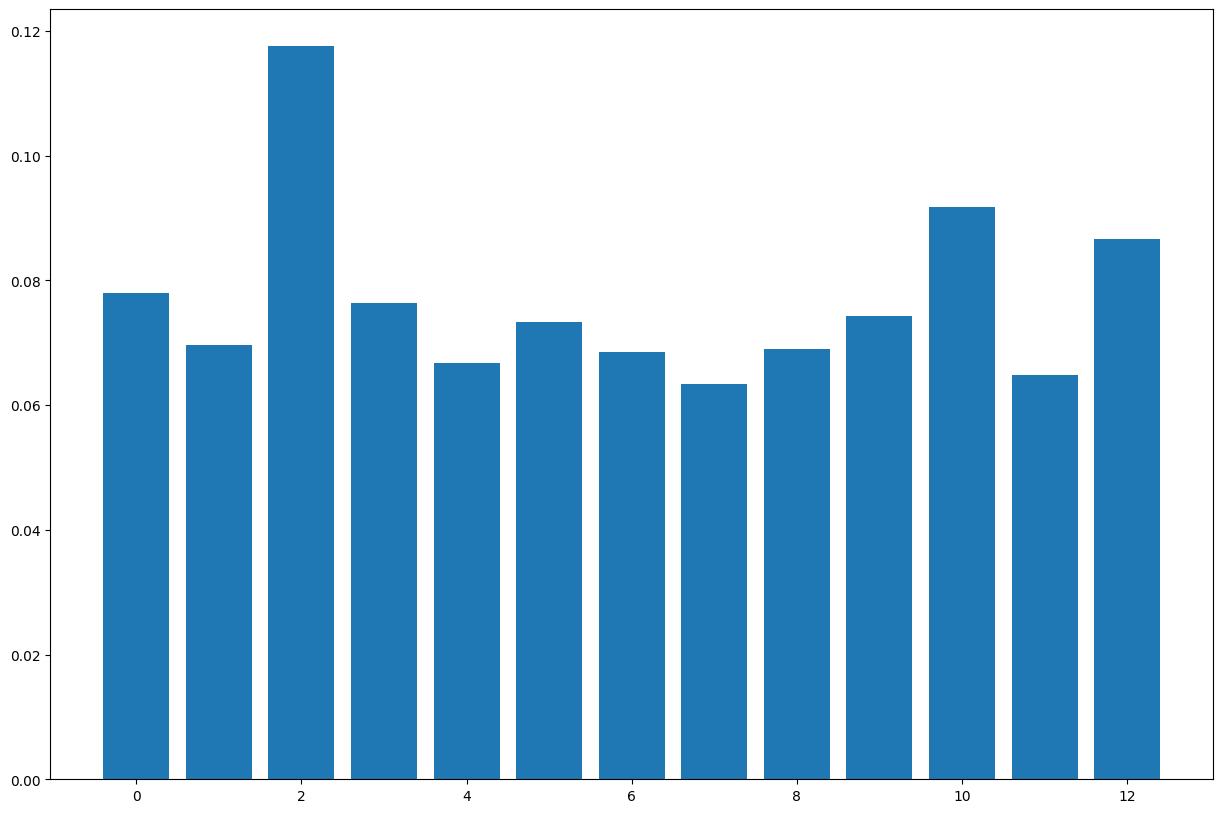

In [65]:
import matplotlib.pyplot as plt

# Feature Importance 계산
importance = model.feature_importances_

# 시각화
plt.bar(range(len(importance)), importance)
plt.show()

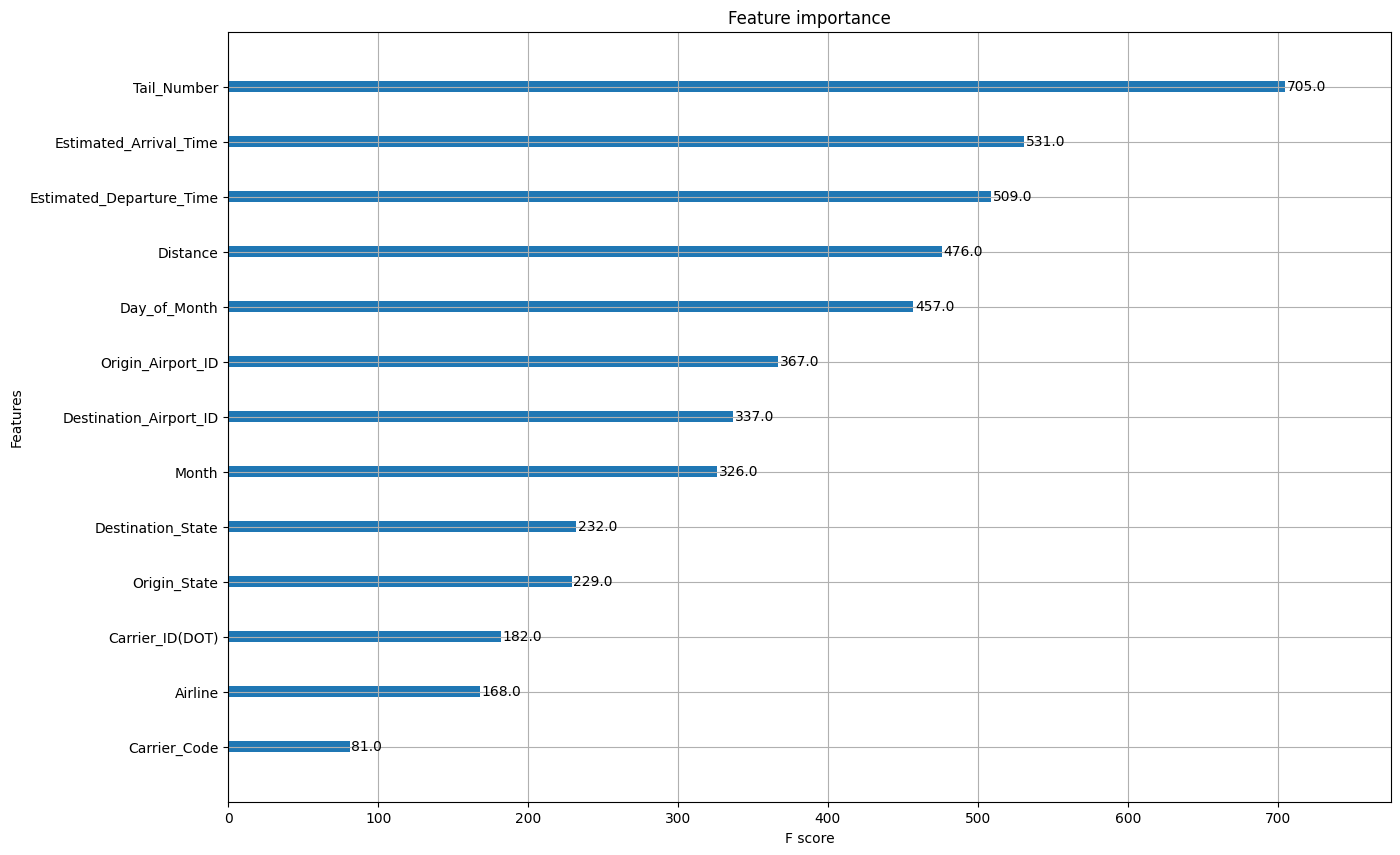

In [66]:
# 변수 중요도 시각화
xgb.plot_importance(model)
plt.show()